# **i. Perkenalan**
---
Phase 1 Milestone 2

Bintang Ksatrio Pratomo

RMT 003

Link Google Slides  : https://docs.google.com/presentation/d/1bzPo1IkerTCB5oV_iLj9N3rgxYd_FBW24nfwsfGHals/edit?usp=sharing

Link Dataset Kaggle : https://www.kaggle.com/datasets/jawadkhattak/us-flight-delay-from-january-2017-july-2022/data

Link Tableau        : https://public.tableau.com/views/MILESTONE2_17375732604380/U_SDelayData?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# **ii. Identifikasi Masalah**
---







> Latar Belakang

Keterlambatan penerbangan atau yang lebih familiar disebut dengan Delay, merupakan salah satu tantangan utama dalam industri penerbangan. Selain berperan sebagai penghubung antar wilayah dan negara, penerbangan berperan penting dalam perekonomian global. Disisi lain, keterlambatan penerbangan juga mempengaruhi tingkat kepuasan pelanggan serta efisiensi operasional maskapai dan bandara. Dengan meningkatnya volume penerbangan setiap tahunnya, analisis terhadap pola dan penyebab keterlambatan sangat penting untuk membantu para Stakeholders mengidentifikasi masalah utama dan merumuskan strategi untuk mengurangi dampak keterlambatan



> Problem Statement


---


**Menganalisis alasan keterlambatan penerbangan di Amerika Serikat menggunakan metrik dan teknik statistik untuk memahami penyebab utama, sehingga memungkinkan pengembangan strategi yang efektif dalam mengurangi keterlambatan dalam satu tahun ke depan.**



---


**Specific**: Menganalisis dataset keterlambatan penerbangan di Amerika Serikat yang mencakup data waktu keterlambatan, penyebab keterlambatan, serta distribusi keterlambatan berdasarkan maskapai dan bandara untuk memahami pola keterlambatan secara menyeluruh.

**Measurable**: Menggunakan metrik seperti rata-rata waktu keterlambatan, proporsi penerbangan yang terlambat, distribusi keterlambatan berdasarkan penyebab, dan korelasi antara keterlambatan dengan jumlah penerbangan di bandara tertentu.

**Achievable**: Memanfaatkan teknik analisis data seperti statistik deskriptif, visualisasi data, dan uji korelasi untuk mengidentifikasi pola keterlambatan serta mengukur dampak dari berbagai penyebab keterlambatan.

**Relevant**: Pemahaman terhadap pola keterlambatan dan penyebab utamanya dapat membantu maskapai, otoritas bandara, dan regulator penerbangan dalam mengembangkan strategi yang efektif untuk mengurangi keterlambatan dan meningkatkan efisiensi operasional.

**Time-Bound**: Memberikan rekomendasi berbasis data untuk mengurangi keterlambatan penerbangan dalam satu tahun ke depan, dengan fokus pada bulan atau musim dengan tingkat keterlambatan tertinggi.

> Key Questions

0. Bagaimana tren keterlambatan penerbangan berdasarkan bulan. Metriks : menghitung rata rata keterlambatan yang disebabkan oleh maskapai dibandingkan dengan bulan & tahun

1. Bagaimana tren keterlambatan penerbangan. Metriks : kumpulan rata-rata waktu keterlambatan per bulan
2. Bagaimana perbandingan jumlah waktu keterlambatan berdasarkan penyebab (carrier_delay, weather_delay, nas_delay, security_delay, dan late_aircraft_delay). Metriks : total waktu keterlambatan untuk masing-masing kategori penyebab
3. Maskapai mana yang memiliki jumlah keterlambatan tertinggi dan terendah. Metriks : Perbandingan jumlah waktu keterlambatan antar maskapai
4. Negara bagian (State) mana yang memiliki jumlah keterlambatan yang paling tinggi. Metriks : Kumpulan jumlah keterlambatan pada setiap state
5. Apakah ada hubungan yang signifikan antara arriving flight dengan total Total_Delay. Metriks : analisa korelasi antara arriving flights dan total delay.
6. Apakah rata-rata keterlambatan yang disebabkan oleh maskapai (carrier_delay) berbeda secara signifikan dari keterlambatan yang disebabkan oleh cuaca (weather_delay). Metriks : Uji statistik untuk membandingkan dua sample 

# **iii. Data Loading**
---

In [1]:
#Library yang digunakan
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Source File =  https://www.kaggle.com/datasets/jawadkhattak/us-flight-delay-from-january-2017-july-2022
# Path file csv yg akan di ubah menjadi dataframe
file_path = 'Airline_Delay_Cause.csv'

# Input file csv ke dalam dataframe
df = pd.read_csv(file_path)

# Tampilkan head atau 5 data pertama dari dataframe
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


# **iv. Data Cleaning**



> Data Preparation & Preprocessing (Handling kolom yang tidak relevan)



In [3]:
# Gabungkan kolom year dan month menjadi satu variabel dengan tipe data datetime, dengan set tanggal as default = 1
df['Datetime'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))

In [4]:
# Pecah kolom airport_name menjadi airport_name, state, city
df[['city', 'airport_name']] = df['airport_name'].str.split(',', expand=True)

In [5]:
df[['state', 'airport_name']] = df['airport_name'].str.split(':', expand=True)

In [6]:
# Trim Spasi berlebih
df['state'] = df['state'].str.strip()
df['airport_name'] = df['airport_name'].str.strip()
df['city'] = df['city'].str.strip()

In [7]:
#rename kolom agar lebih mudah dibaca
df.rename(columns={'arr_delay': 'Total_Delay','arr_flights':'arriving_flights', 'carrier_delay':'caused_by_carrier','weather_delay':'caused_by_weather','nas_delay':'caused_by_NAS','security_delay':'caused_by_security_issues','late_aircraft_delay':'caused_by_late_aircraft'}, inplace=True)

In [8]:
# Hapus Kolom yang dianggap tidak penting
# Kita hanya fokus terhadap faktor faktor penyebab delay
df.drop(['carrier','airport','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct','arr_cancelled','arr_diverted'], axis=1, inplace=True)

In [9]:
#Tambahkan penjabaran atau penjelasan kode state di bagian amerika untuk memudahkan pembacaan data
state_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

df['state_name'] = df['state'].map(state_to_name)

In [10]:
# Lihat hasil data sementara sebelum dihandling missing value & duplicate
df.head()

,year,month,carrier_name,airport_name,arriving_flights,Total_Delay,caused_by_carrier,caused_by_weather,caused_by_NAS,caused_by_security_issues,caused_by_late_aircraft,Datetime,city,state,state_name
0,2022,7,Endeavor Air Inc.,Lehigh Valley International,33.0,129.0,98.0,23.0,8.0,0.0,0.0,2022-07-01,Allentown/Bethlehem/Easton,PA,Pennsylvania
1,2022,7,Endeavor Air Inc.,Southwest Georgia Regional,78.0,1664.0,887.0,52.0,224.0,0.0,501.0,2022-07-01,Albany,GA,Georgia
2,2022,7,Endeavor Air Inc.,Nantucket Memorial,124.0,1523.0,388.0,35.0,511.0,0.0,589.0,2022-07-01,Nantucket,MA,Massachusetts
3,2022,7,Endeavor Air Inc.,Alexandria International,67.0,657.0,103.0,82.0,93.0,25.0,354.0,2022-07-01,Alexandria,LA,Louisiana
4,2022,7,Endeavor Air Inc.,Augusta Regional at Bush Field,174.0,2462.0,1686.0,310.0,139.0,0.0,327.0,2022-07-01,Augusta,GA,Georgia




> Handling Missing Value & Duplicate



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101315 entries, 0 to 101314
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   year                       101315 non-null  int64         
 1   month                      101315 non-null  int64         
 2   carrier_name               101315 non-null  object        
 3   airport_name               101315 non-null  object        
 4   arriving_flights           101157 non-null  float64       
 5   Total_Delay                101157 non-null  float64       
 6   caused_by_carrier          101157 non-null  float64       
 7   caused_by_weather          101157 non-null  float64       
 8   caused_by_NAS              101157 non-null  float64       
 9   caused_by_security_issues  101157 non-null  float64       
 10  caused_by_late_aircraft    101157 non-null  float64       
 11  Datetime                   101315 non-null  datetime

In [12]:
df.isnull().sum()

year                            0
month                           0
carrier_name                    0
airport_name                    0
arriving_flights              158
Total_Delay                   158
caused_by_carrier             158
caused_by_weather             158
caused_by_NAS                 158
caused_by_security_issues     158
caused_by_late_aircraft       158
Datetime                        0
city                            0
state                           0
state_name                   2969
dtype: int64

In [13]:
#imputasi menggunakan fillna
df['state_name'].fillna('Unknown')
df['state_name'] = df['state_name'].astype(str)

df.fillna(0, inplace=True)

In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.duplicated().sum()

np.int64(0)



> Handling Inconsistence Data



In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101315 entries, 0 to 101314
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   year                       101315 non-null  int64         
 1   month                      101315 non-null  int64         
 2   carrier_name               101315 non-null  object        
 3   airport_name               101315 non-null  object        
 4   arriving_flights           101315 non-null  float64       
 5   Total_Delay                101315 non-null  float64       
 6   caused_by_carrier          101315 non-null  float64       
 7   caused_by_weather          101315 non-null  float64       
 8   caused_by_NAS              101315 non-null  float64       
 9   caused_by_security_issues  101315 non-null  float64       
 10  caused_by_late_aircraft    101315 non-null  float64       
 11  Datetime                   101315 non-null  datetime

**Tipe Data sudah sesuai / konsisten**

# **v. Analisis dan Perhitungan**

# 0. Bagaimana tren keterlambatan penerbangan berdasarkan bulan. Metriks : menghitung rata rata keterlambatan yang disebabkan oleh maskapai dibandingkan dengan bulan & tahun


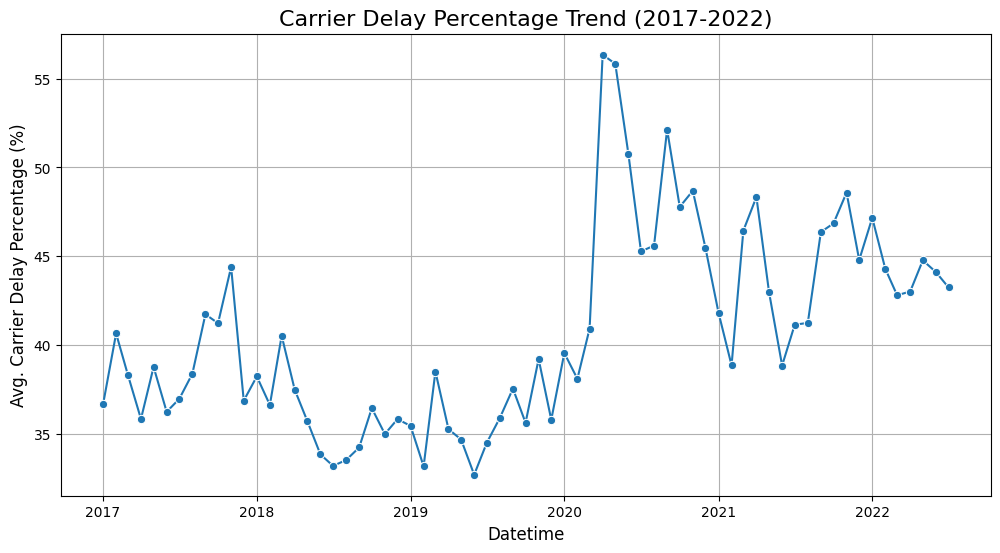

In [17]:
# Simpan persentase keterlambatan akibat maskapai
df['carrier_delay_percentage'] = (df['caused_by_carrier'] / df['Total_Delay']) * 100

# Agregasi data untuk menghitung rata-rata persentase per bulan
monthly_trend = (df.groupby(['year', 'month'])['carrier_delay_percentage'].mean().reset_index())

# Gabungkan year dan month menjadi kolom datetime untuk visualisasi
monthly_trend['Datetime'] = pd.to_datetime(monthly_trend[['year', 'month']].assign(day=1))

# Plot tren persentase keterlambatan akibat maskapai
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_trend,
    x='Datetime',
    y='carrier_delay_percentage',
    marker='o'
)
plt.title('Carrier Delay Percentage Trend (2017-2022)', fontsize=16)
plt.xlabel('Datetime', fontsize=12)
plt.ylabel('Avg. Carrier Delay Percentage (%)', fontsize=12)
plt.grid(True)
plt.show()




# 1. Bagaimana tren keterlambatan penerbangan. Metriks : kumpulan rata-rata waktu keterlambatan per bulan.


In [18]:
df_delay = df.groupby('Datetime')['Total_Delay'].mean().reset_index()

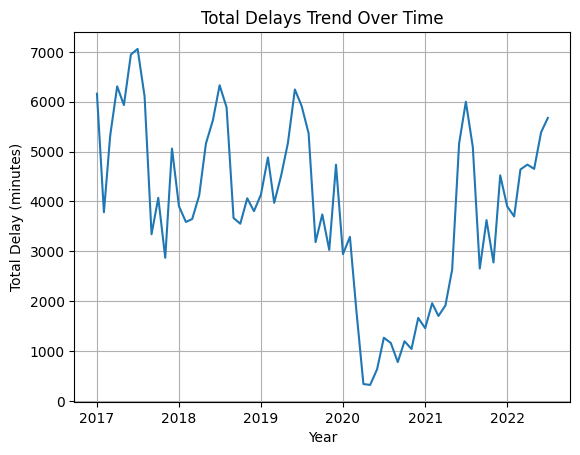

In [19]:
# Buat plot
sns.lineplot(x='Datetime', y='Total_Delay', data=df_delay)

# Masukkan label dan judul plot
plt.xlabel("Year")
plt.ylabel("Total Delay (minutes)")
plt.title("Total Delays Trend Over Time")

# Menampilkan grid pada plot
plt.grid(True)

# Tampilkan plot
plt.show()


Trend line menunjukkan rata-rata delay kedatangan pesawat dari Januari 2017 hingga Juli 2022.  
Dapat dilihat bahwa terjadi fluktuasi pada delay selama periode tersebut, tanpa tren yang jelas naik atau turun. Total delay yg paling sedikit terjadi antara tahun 2020 - 2021, dan total delay tertinggi terjadi antara 2017-2018.
Perlu analisis lebih lanjut untuk mengidentifikasi faktor-faktor yang menyebabkan fluktuasi ini dan untuk menentukan apakah ada pola musiman dalam keterlambatan penerbangan.

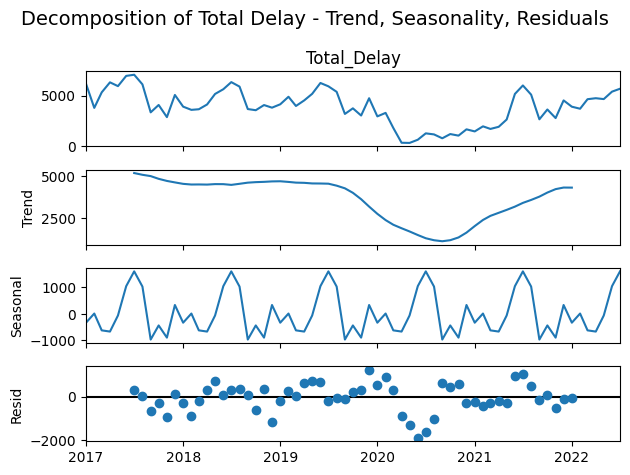

In [20]:
#DEKOMPOSISI DATA untuk melihat trend

# Mengelompokkan data berdasarkan bulan dan tahun untuk menghitung rata-rata keterlambatan bulanan
monthly_delays = (df.groupby(['year', 'month'])['Total_Delay'].mean().reset_index().sort_values(by=['year', 'month']))

# Membuat kolom periode bulanan untuk analisis deret waktu
monthly_delays['period'] = pd.to_datetime(monthly_delays['year'].astype(str) + '-' + monthly_delays['month'].astype(str) + '-01')

monthly_delays.set_index('period', inplace=True)

# Dekomposisi data deret waktu
decomposition = seasonal_decompose(monthly_delays['Total_Delay'], model='additive', period=12)

# Visualisasi hasil dekomposisi
decomposition.plot()
plt.suptitle('Decomposition of Total Delay - Trend, Seasonality, Residuals', fontsize=14)
plt.tight_layout()
plt.show()

terlihat residue yg sedikit banyak sehinggan dapat bandingkan menggunakan metode multiplicative

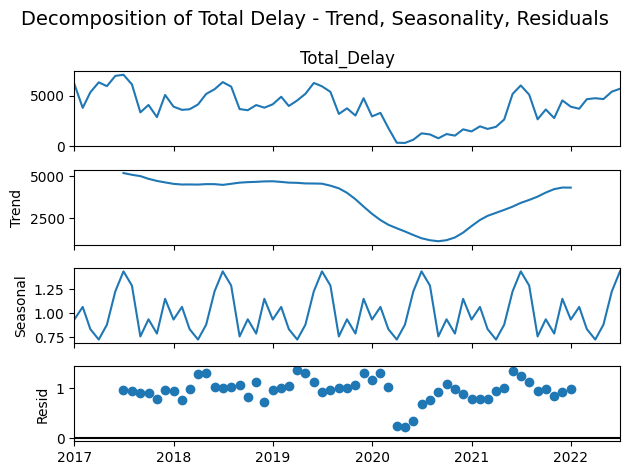

In [21]:
# Mengelompokkan data berdasarkan bulan dan tahun untuk menghitung rata-rata keterlambatan bulanan
monthly_delays = (df.groupby(['year', 'month'])['Total_Delay'].mean().reset_index().sort_values(by=['year', 'month']))

# Membuat kolom periode bulanan untuk analisis deret waktu
monthly_delays['period'] = pd.to_datetime(monthly_delays['year'].astype(str) + '-' + monthly_delays['month'].astype(str) + '-01')

monthly_delays.set_index('period', inplace=True)

# Dekomposisi data deret waktu
decomposition = seasonal_decompose(monthly_delays['Total_Delay'], model='multiplicative', period=12)

# Visualisasi hasil dekomposisi
decomposition.plot()
plt.suptitle('Decomposition of Total Delay - Trend, Seasonality, Residuals', fontsize=14)
plt.tight_layout()
plt.show()

ternyata residu berukurang drastis, sehingga kita dapat mengacu pada decomposisi dengan metode multiplicative karena lebih akurat.

Dapat dilihat ternyata ada pola musiman yang terjadi pada keterlambatan pesawat. Untuk mengetahui lebih lanjut, maka lakukan analisis yg lebih spesifik

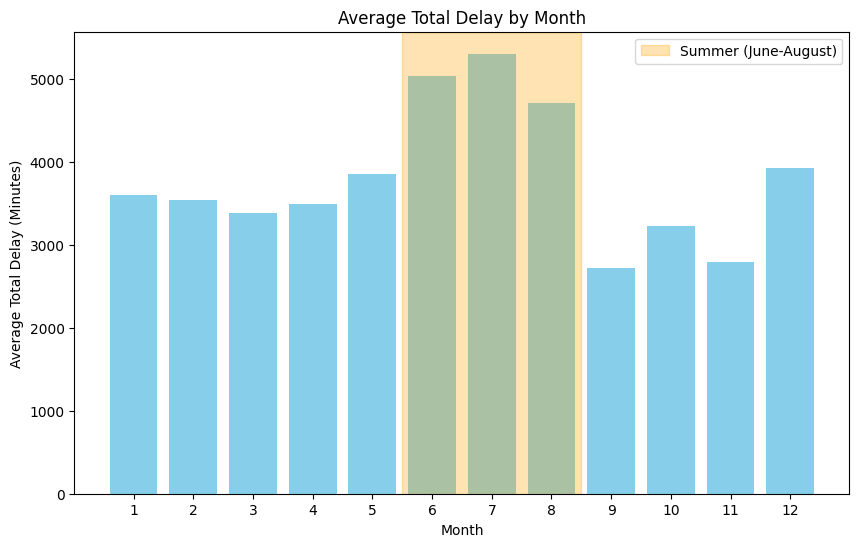

In [22]:
# Mengelompokkan data berdasarkan bulan untuk menghitung rata-rata keterlambatan bulanan
monthly_avg_delay = df.groupby('month')['Total_Delay'].mean().reset_index()

# Visualisasi data rata-rata keterlambatan bulanan
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_delay['month'], monthly_avg_delay['Total_Delay'], color='skyblue')
plt.xticks(monthly_avg_delay['month'])
plt.xlabel('Month')
plt.ylabel('Average Total Delay (Minutes)')
plt.title('Average Total Delay by Month')
plt.axvspan(5.5, 8.5, color='orange', alpha=0.3, label='Summer (June-August)')
plt.legend()
plt.show()

Sehingga dapat disimpulkan bahwa keterlambatan ini memiliki trend seasonal yang mana puncaknya ada pada musim panas dibulan 6,7, dan 8.

# 2. Bagaimana perbandingan jumlah waktu keterlambatan berdasarkan penyebab (carrier_delay, weather_delay, nas_delay, security_delay, dan late_aircraft_delay). Metriks : total waktu keterlambatan untuk masing-masing kategori penyebab



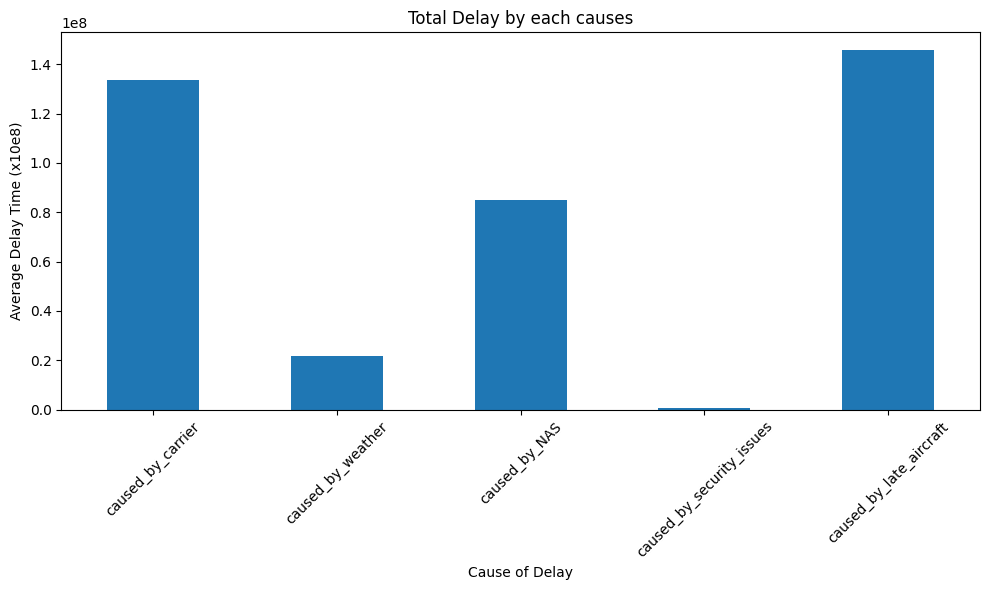

In [23]:
# Mengelompokan dan menghitung rata rata waktu (dalam menit) berdasarkan faktor penyebab delay
sum_delays = df[['caused_by_carrier', 'caused_by_weather', 'caused_by_NAS', 'caused_by_security_issues', 'caused_by_late_aircraft']].sum()

# Menggunakan bar chart
plt.figure(figsize=(10, 6))
sum_delays.plot(kind='bar')
plt.title('Total Delay by each causes')
plt.xlabel('Cause of Delay')
plt.ylabel('Average Delay Time (x10e8)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bar chart diatas menggambarkan jumlah waktu (dikali 100.000.000) delay yang tercatat. Dapat disimpulkan bahwa dalam waktu kurang lebih 5 tahun,  permasalahan utama yg paling sering dihadapi oleh airport adalah keterlambatan pesawat yang datang dan juga masalah masalah teknis dan non teknis yang dihadapi oleh maskapai penerbangan

# 3. Maskapai mana yang memiliki jumlah keterlambatan tertinggi dan terendah. Metriks : Perbandingan jumlah waktu keterlambatan antar maskapai



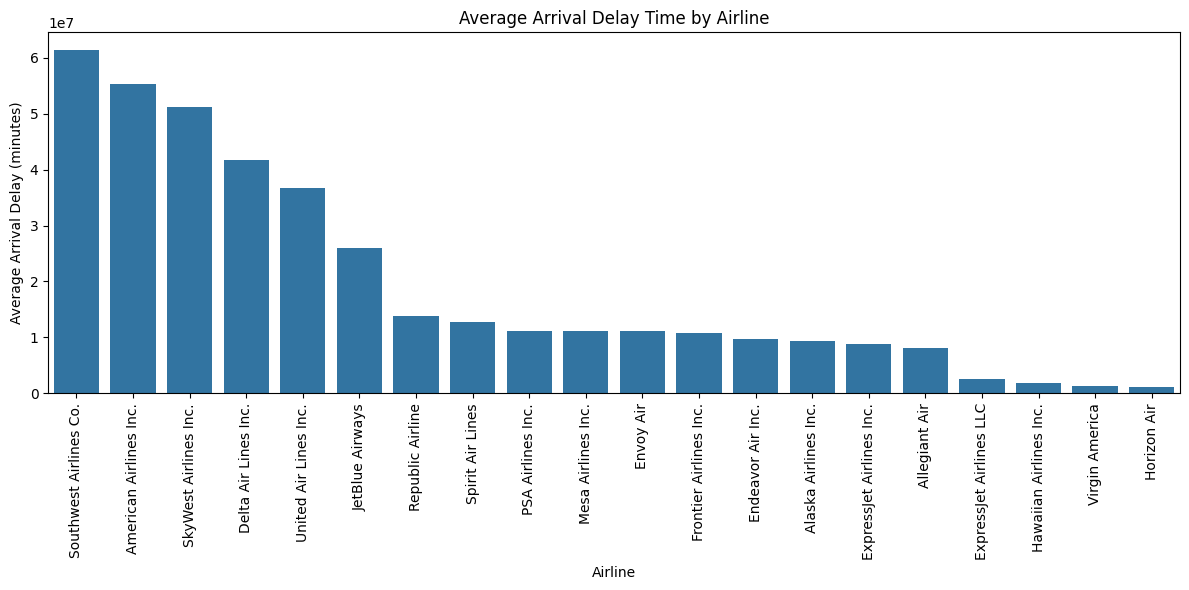

In [24]:
airline_delays = df.groupby('carrier_name')['Total_Delay'].sum().sort_values(ascending=False)

#print("Average Arrival Delay Times by Airline:")
#print(airline_delays)

#Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_delays.index, y=airline_delays.values)
plt.xlabel("Airline")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Average Arrival Delay Time by Airline")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Bar chart diatas menunjukkan perbandingan rata rata delay pada setiap maskapai yang terdaftar pada setiap airport. Dapat disimpulkan bahwa maskapai dengan rata rata delay terlama adalah Southwest Airlines Co. dan yang paling sedikit adalah Horizon Air. Dengan demikian perlu dilakukan analisa lebih lanjut mengenai alasan mengapa maskapai tersebut dapat mendapatkan rata rata delay yang signifikan.

# 4. Negara bagian (State) mana yang memiliki jumlah keterlambatan yang paling tinggi. Metriks : Kumpulan jumlah keterlambatan pada setiap state

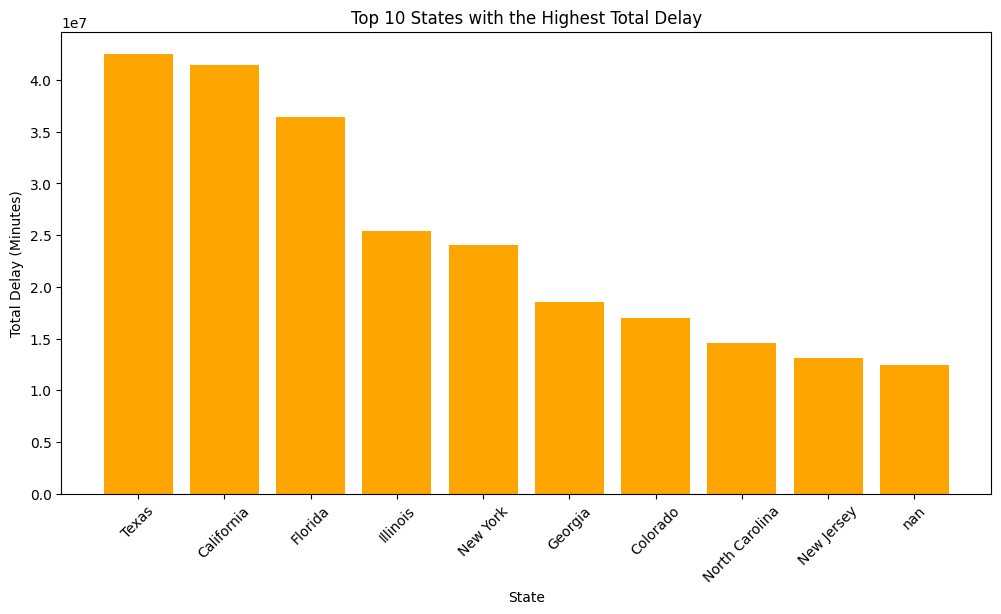

In [25]:
# Mengelompokkan data berdasarkan negara bagian untuk menghitung jumlah keterlambatan

#Lihat state dengan jumlah delay tertinggi
state_sum_delay = (
    df.groupby('state_name')['Total_Delay']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Visualisasi Top 10 State dengan Total Delay Tertinggi
plt.figure(figsize=(12, 6))
plt.bar(state_sum_delay['state_name'][:10], state_sum_delay['Total_Delay'][:10], color='orange')
plt.xlabel('State')
plt.ylabel('Total Delay (Minutes)')
plt.title('Top 10 States with the Highest Total Delay')
plt.xticks(rotation=45)
plt.show()


State dengan urutan total delay terbanyak adalah New Jersey, Illinois, Massachusetts.

In [26]:
# Menghitung total volume penerbangan per negara bagian
state_flight_volume = (
    df.groupby('state_name')['arriving_flights']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Menampilkan top 10 negara bagian berdasarkan volume penerbangan
print(state_flight_volume.head(10))

       state_name  arriving_flights
0      California         3819020.0
1           Texas         3640898.0
2         Florida         2902453.0
3         Georgia         1982368.0
4        Illinois         1964437.0
5        New York         1562744.0
6        Colorado         1483629.0
7  North Carolina         1414635.0
8             nan         1033143.0
9         Arizona          997669.0


Dapat dilihat bahwa state yg memiliki jumlah penerbangan yg tinggi adalah, California, Texas, Florida. Hal ini menunjukkan bahwa secara logika, kedua parameter ini memiliki hubugan yang saling mempengaruhi. Dapat dilihat bahwa california, texas dan florida memiliki jumlah penerbangan terbanyak, begitu pula dengan total delay terbanyak. Untuk mendapatkan hasil pastinya, kita dapat melakukan uji analisa korelasi seperti yg akan dijawab pada soal nomor 5. 

# 5. Statistik Deskriptif
Apakah ada hubungan yang signifikan antara arriving flight dengan total Total_Delay

In [27]:
#Uji Normalitas menggunakan Shapiro-Wilk

arriving_flights = df['arriving_flights']
Total_Delay = df['Total_Delay']

shapiro_arr_flights = shapiro(arriving_flights.sample(5000))  # Random sample
shapiro_total_delay = shapiro(Total_Delay.sample(5000))  # Random sample

{"shapiro_arr_flights": shapiro_arr_flights, "shapiro_total_delay": shapiro_total_delay}

{'shapiro_arr_flights': ShapiroResult(statistic=np.float64(0.3104511538905893), pvalue=np.float64(2.9746611880684976e-87)),
 'shapiro_total_delay': ShapiroResult(statistic=np.float64(0.2851084701678174), pvalue=np.float64(4.5341724744234125e-88))}

pvalue arriving_flights < 0.05 --> Distribusi Tidak Normal

pvalue Total_Delay < 0.05 --> Distribusi Tidak Normal


Karena data tidak terdistribusi normal, maka metode analisa korelasi yg tepat adalah menggunakan Spearman / Kendall

In [28]:
correlation_result = df[['arriving_flights', 'Total_Delay']].corr(method='pearson')
correlation_result

,arriving_flights,Total_Delay
arriving_flights,1.000000,0.873428
Total_Delay,0.873428,1.000000


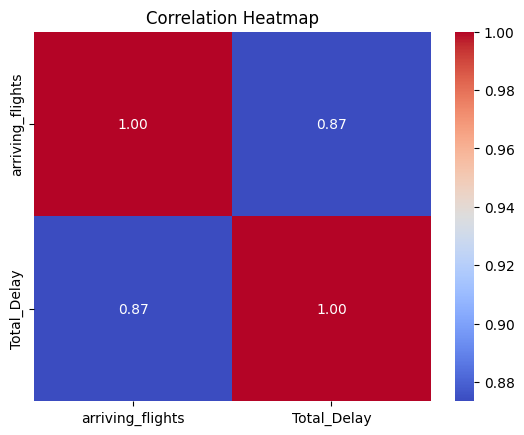

In [29]:
sns.heatmap(correlation_result, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()


Korelasi antara arriving_flights dan Total_Delay menujukkan angka 0.87 (sangat kuat dan positif).
Dapat disimpulkan bahwa semakin banyak penerbangan yg tiba di bandara, semakin besar total keterlambatan yang terjadi. 

# 6. Statistik Inferensial
Apakah rata-rata keterlambatan yang disebabkan oleh maskapai (carrier_delay) berbeda secara signifikan dari keterlambatan yang disebabkan oleh cuaca (weather_delay)



---

***H0: Tidak ada perbedaan signifikan antara rata-rata keterlambatan yang disebabkan oleh maskapai (caused_by_carrier) dan cuaca (caused_by_weather)***

***H1: Ada perbedaan signifikan antara rata-rata keterlambatan yang disebabkan oleh maskapai (caused_by_carrier) dan cuaca (caused_by_weather)***

---



Karena data tidak berdistribusi normal, maka gunakan uji statistik non parametrik untuk membandingkan dua sample, yaitu Wilcoxon signed-rank

In [30]:
stat, p = wilcoxon(df['caused_by_carrier'], df['caused_by_weather'])
print(f"Wilcoxon Test: Statistic={stat}, p-value={p}")

Wilcoxon Test: Statistic=181925012.5, p-value=0.0


p < 0.05, maka tolak H0

Artinya terdapat perbedaan signifikan antara rata-rata keterlambatan yang disebabkan oleh maskapai dan cuaca.

# vi. Kesimpulan & Rekomendasi



---



> Kesimpulan


---




Mengacu pada analisis analisis yang telah dilakukan terhadap dataset, keterlambatan penerbangan di Amerika Serikat memiliki pola seasonal, dengan puncaknya terjadi pada musim panas (bulan 6,7,8). Penyebab utama keterlambatan adalah late aircraft delay, diikuti oleh NAS delay dan carrier delay, sementara cuaca berkontribusi lebih kecil meskipun pada realitanya cuaca dapat berpengaruh besar terhadap penerbangan. Maskapai tertentu juga memiliki rata-rata waktu keterlambatan yang lebih tinggi dibandingkan yg lainnya, menandakan adanya masalah operasional yang memerlukan perhatian.


  




---



> Rekomendasi


---



Adapun beberapa hal yang dapat ditingkatkan, yaitu:
- Optimasi Manajemen NAS: Pihak bandara dapat melakukan optimasi guna menunjang efisiensi sistem navigasi udara dengan cara melakukan pembaruan baik dari segi software/hardware serta mengadakan pelatihan untuk meningkatkan kualitas SDM yg ada pada National Aviation System
- Meningkatkan Infrastruktur : Meningkatkan infrastruktur agar dapat membantu mengurangi permasalahan yg terjadi. Baik dari segi pelayanan konsumen, dan juga penanganan masalah yg terjadi pada pesawat(maskapai)

Hal ini diharapkan dapat secara signifikan mengurangi rata-rata keterlambatan penerbangan, meningkatkan pengalaman konsumen, dan efisiensi operasional di seluruh sistem penerbangan AS yang nantinya dapat berdampak positif dalam satu tahun kedepan


In [18]:
#export file to csv untuk tableau
df.to_csv('Airline_Delay_Cause_Cleaned.csv', index=False, encoding='utf-8')